In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

path = 'data/'

def cut_indices(data):
    columns_cut = ['Axe','Segment', 'Arrondissement', 'Desservance', 'Secteur Entretien', 'Classe de route_num', 'Declassement']
    changes_all = data[columns_cut].shift(1) != data[columns_cut]
    changes = changes_all.any(axis=1)
    return np.append(changes[changes].index.values, len(data))

def adjust(x):
    y=np.array(x)
    for i in range(1,len(y)):
        if y[i]>1+y[i-1]:
            y[i:] = y[i:] + y[i-1] - y[i] + 1
    return y

def compare(y_true,y_pred):
    plt.figure(figsize=(14,5))
    plt.plot(adjust(y_true),'o', label=y_true.name,alpha=1)
    plt.plot(adjust(y_pred),'o', label=y_pred.name,alpha=0.5)
    plt.legend()
    plt.title('Comparison of two labelizations')
    plt.xlabel('Road pavement position')
    plt.ylabel('Cluster label')
    plt.show()

df = pd.read_excel('data/first_axis_labels.xlsx')


# Sections data

In [ ]:
sections = pd.read_excel(path+'road_sections.xlsx')

In [ ]:
sections.shape

(34116, 77)

In [ ]:
sections.head()

,FILENAME,Date,Axe,Segment,PR début,U début [m],PR fin,U fin [m],distance axe début m,distance axe fin m,...,Décl_21,Décl_22,Décl_23,Décl_24,Décl_25,Mesure optimale,Année optimale,test continuité,incrément chantiers,n°chantiers long
0,98R1AII4,2019-08-27 16:44:28,1,96,0,0,0,50,0.0,50.000,...,RT,RT,RT,RT,RT,RT,7,0,1,1_1
1,98R1AII4,2019-08-27 16:44:28,1,96,0,50,0,100,50.0,100.000,...,RT,RT,RT,RT,RT,RT,7,1,1,1_1
2,98R1AII4,2019-08-27 16:44:28,1,96,0,100,0,150,100.0,150.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
3,98R1AII4,2019-08-27 16:44:28,1,96,0,150,0,200,150.0,200.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
4,98R1AII4,2019-08-27 16:44:28,1,96,0,200,0,225,200.0,225.282,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2


In [9]:
first_axis = sections[sections.Axe == 1]
first_axis.to_excel('data/first_axis.xlsx', index=False)

# First axis

In [4]:
data = pd.read_excel(path+'first_axis.xlsx')

In [3]:
data.head()

,FILENAME,Date,Axe,Segment,PR début,U début [m],PR fin,U fin [m],distance axe début m,distance axe fin m,...,Décl_21,Décl_22,Décl_23,Décl_24,Décl_25,Mesure optimale,Année optimale,test continuité,incrément chantiers,n°chantiers long
0,98R1AII4,2019-08-27 16:44:28,1,96,0,0,0,50,0.0,50.000,...,RT,RT,RT,RT,RT,RT,7,0,1,1_1
1,98R1AII4,2019-08-27 16:44:28,1,96,0,50,0,100,50.0,100.000,...,RT,RT,RT,RT,RT,RT,7,1,1,1_1
2,98R1AII4,2019-08-27 16:44:28,1,96,0,100,0,150,100.0,150.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
3,98R1AII4,2019-08-27 16:44:28,1,96,0,150,0,200,150.0,200.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
4,98R1AII4,2019-08-27 16:44:28,1,96,0,200,0,225,200.0,225.282,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2


In [4]:
def cut_indices(data):
    columns_cut = ['Axe','Segment', 'Arrondissement', 'Desservance', 'Secteur Entretien', 'Classe de route_num', 'Declassement']
    changes_all = data[columns_cut].shift(1) != data[columns_cut]
    changes = changes_all.any(axis=1)
    return np.append(changes[changes].index.values, len(data))

In [5]:
a = data[['Segment','Desservance']].shift(1) != data[["Segment",'Desservance']]
b = a.any(axis=1)
b[b].index.values

array([  0,   9,  47, 188, 193], dtype=int64)

In [6]:
cut_ind= cut_indices(data)

## Clustering K means

In [7]:
def renum(a):
    k=0
    d={a[0]:0}
    for i in range(len(a)):
        try :
            a[i] = d[a[i]]
        except :
            k+=1
            d[a[i]] = k
            a[i] = k
    return a     

In [10]:
# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_All'

# columns = ['distance axe début m', 'Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_Note'

# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
# st='_0_3'

columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
st='_1_3'

data = pd.read_excel(path+'first_axis.xlsx')
X = data[columns]
X = X.replace({'-':None}).astype('float64')
X = X.fillna(X.median())
y = data['incrément chantiers']

cut_ind= cut_indices(data)
n_cut = len(cut_ind)-1

In [11]:
from sklearn.cluster import KMeans

Ks = [3,3,6,1,1]

cuts = cut_ind
y_kmeans = np.array([])

for i in range(n_cut):
    X_cut = X[cuts[i]:cuts[i+1]]
    y_cut = y[cuts[i]:cuts[i+1]]
    k = Ks[i]   # len(y_cut.unique())
    kmeans = KMeans(n_clusters=k).fit(X_cut)

    y_i=renum(kmeans.labels_)+min(y_cut[1:])
    
    # print(k)
    # print(y_i)
    # print(np.array(y_cut))
    # print('')

    y_kmeans = np.append(y_kmeans, y_i)

C:\Users\POSTE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\POSTE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# to_save = X.copy()
to_save = pd.read_excel('data/first_axis_labels.xlsx')

to_save['Real_label'] = y
to_save['Kmeans_label'+st] = y_kmeans.astype('int32')

to_save.to_excel('data/first_axis_labels.xlsx', index=False)

## Features importance

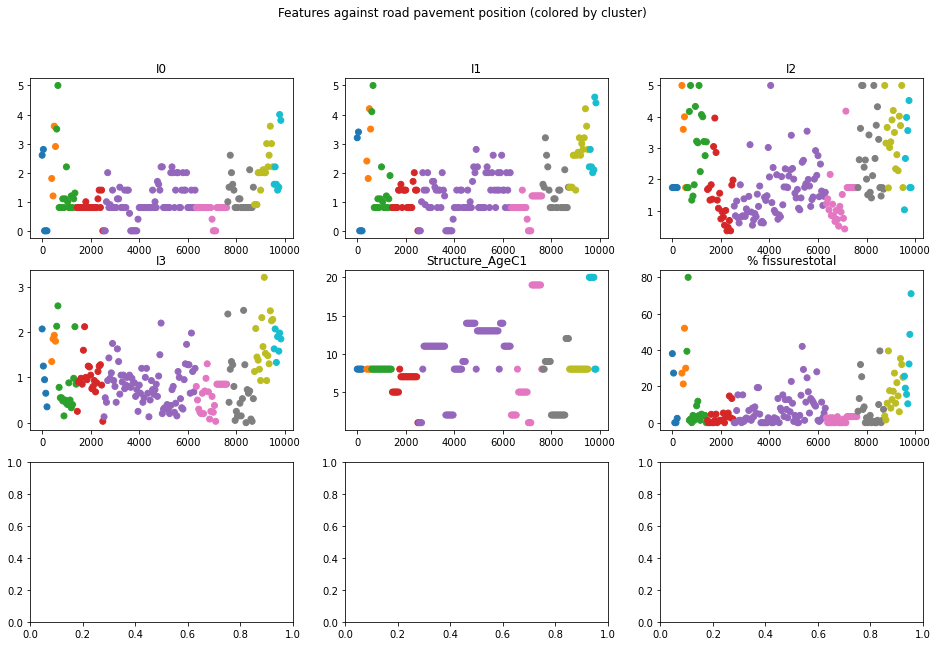

In [130]:
fig,axes = plt.subplots(len(columns)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()[:-1]):
    if i < len(columns)-1:
        ax.scatter(X['distance axe début m'],X[columns[i+1]], c = y,cmap='tab10')
        ax.set_title(columns[i+1])
plt.suptitle('Features against road pavement position (colored by cluster)')
plt.show()

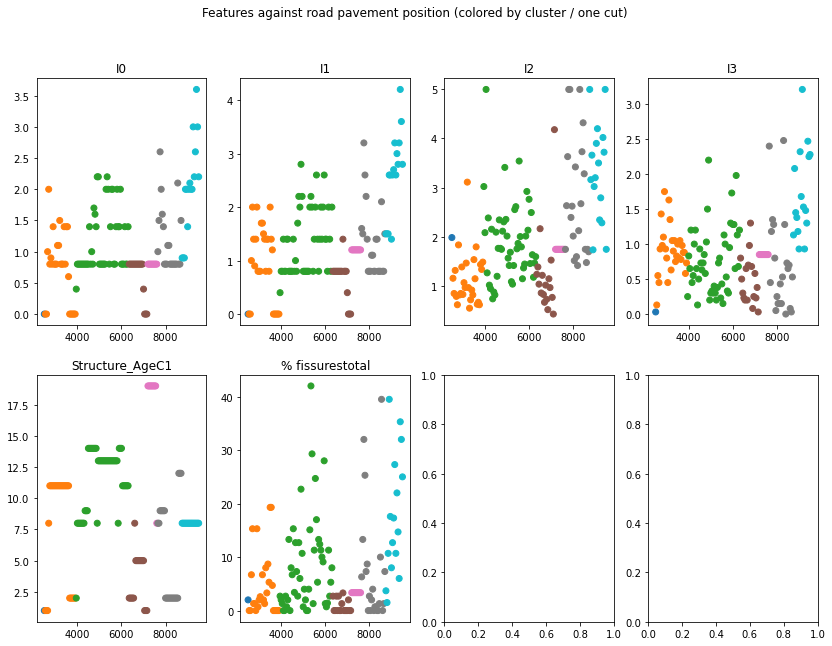

In [81]:
i=2

X_cut = X[cuts[i]:cuts[i+1]]
y_cut = y[cuts[i]:cuts[i+1]]

fig,axes = plt.subplots(len(columns)//3 + 1,4, figsize=(14,10))
for i,ax in enumerate(axes.flatten()[:-1]):
    if i < len(columns)-1:
        ax.scatter(X_cut['distance axe début m'],X_cut[columns[i+1]], c = y_cut,cmap='tab10')
        ax.set_title(columns[i+1])
plt.suptitle('Features against road pavement position (colored by cluster / one cut)')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_cut, y_cut)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(X_cut.iloc[:].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)



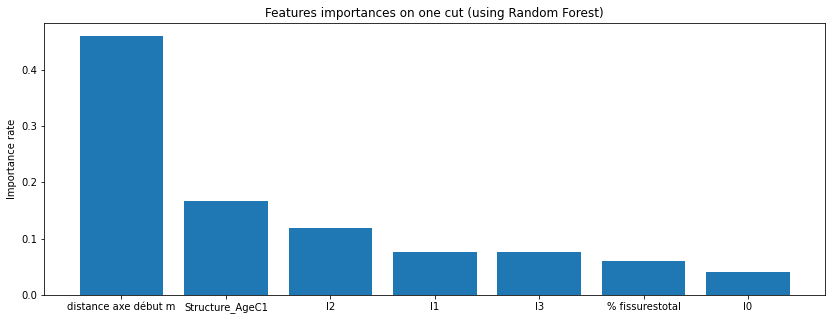

In [37]:
# Show
plt.figure(figsize=(14,5))
plt.bar(most_important_features, most_important_weights)
plt.title('Features importances on one cut (using Random Forest)')
plt.ylabel('Importance rate')
plt.show()

In [123]:
sections = pd.read_excel(path+'road_sections.xlsx')
cut_ind_all = cut_indices(sections)

columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]

data_all = sections[columns]
label_all = sections['incrément chantiers']

data_all = data_all.replace({'-':None}).astype('float64')
data_all = data_all.fillna(data_all.median())

label_all[10370]=1  # Missing label
label_all = label_all.astype('string')

<ipython-input-123-ad00265a4697>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_all[10370]=1  # Missing label


In [151]:
columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]

In [125]:
import tqdm
weights = np.zeros(len(columns))

for i in tqdm.tqdm(range(len(cut_ind_all)-1)):
    X_cut = data_all[cut_ind_all[i]:cut_ind_all[i+1]]
    y_cut = label_all[cut_ind_all[i]:cut_ind_all[i+1]]
    
    clf = RandomForestClassifier()
    clf.fit(X_cut, y_cut)

    weights += clf.feature_importances_

print(weights / (len(cut_ind_all)-1))

100%|██████████| 607/607 [01:40<00:00,  6.04it/s]

[0.17975246 0.05392793 0.0526083  0.03926769 0.04190536 0.06221781
 0.02371868 0.03046486 0.00970743 0.02661469 0.0141997  0.05375347]


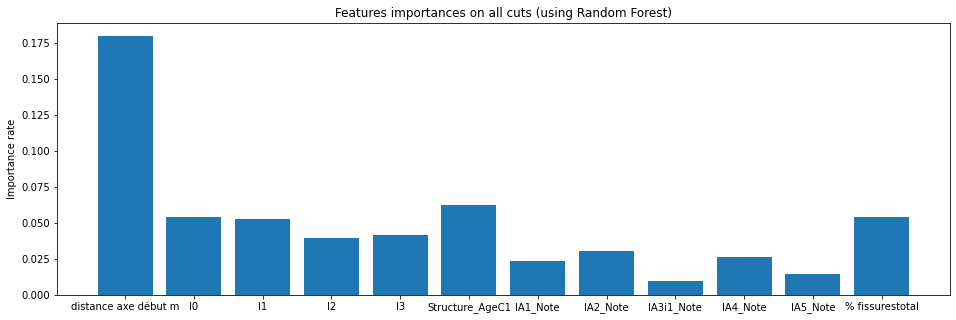

In [133]:
plt.figure(figsize=(16,5))
plt.bar(columns, weights / (len(cut_ind_all)-1))
plt.title('Features importances on all cuts (using Random Forest)')
plt.ylabel('Importance rate')
plt.show()

In [169]:
weights_to = [0.17975246, 0.05392793, 0.0526083,  0.03926769, 0.04190536, 0.06221781, 0.02371868, 0.03046486, 0.00970743, 0.02661469, 0.0141997,  0.05375347]
weights_df = pd.DataFrame(weights_to, index=columns, columns=['weight'])
weights_df.to_csv('data/weights.csv', index=True)

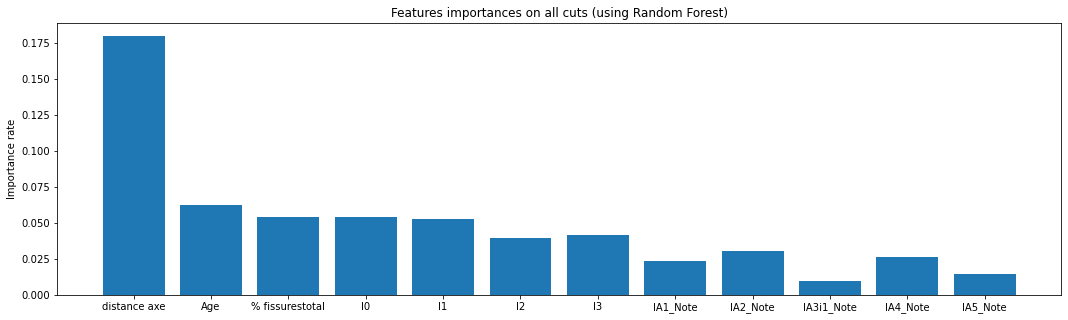

In [50]:
columns = ['distance axe début m','Structure_AgeC1',"% fissurestotal" ,'I0', 'I1', 'I2', 'I3', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note']
columns_bis = ['distance axe','Age',"% fissurestotal" ,'I0', 'I1', 'I2', 'I3', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note']

weights_ = pd.read_csv('data/weights.csv',index_col=0)
weights = weights_.loc[columns].weight.values

plt.figure(figsize=(18,5))
plt.bar(columns_bis, weights)
plt.title('Features importances on all cuts (using Random Forest)')
plt.ylabel('Importance rate')
plt.show()

## Divisive clustering

Text(0, 0.5, 'Euclidean distance')

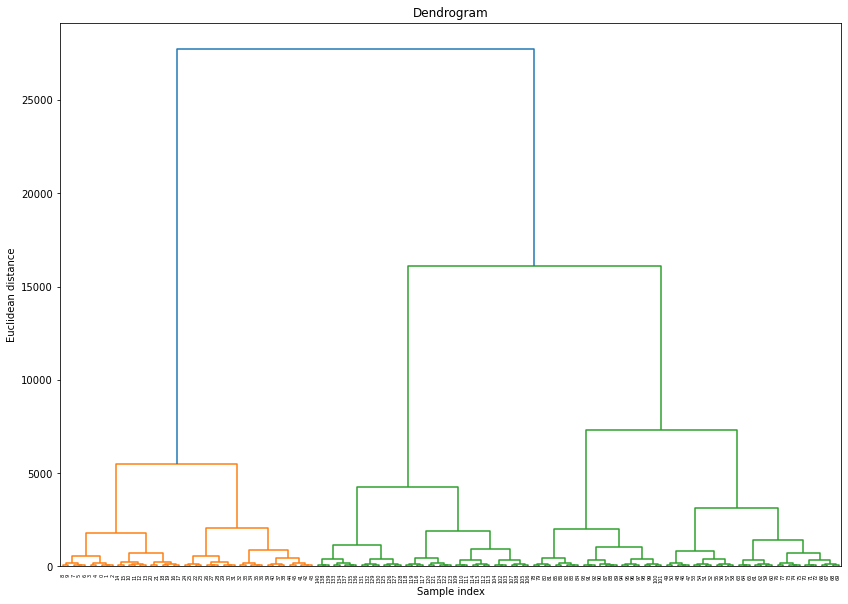

In [ ]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(14, 10))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(X_cut, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [21]:
from sklearn.cluster import AgglomerativeClustering

# clustering = AgglomerativeClustering(n_clusters=6).fit(X_cut)

In [23]:
# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_All'

# columns = ['distance axe début m', 'Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_Note'

# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
# st='_0_3'

columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
st='_1_3'

X = data[columns]
X = X.replace({'-':None}).astype('float64')
X = X.fillna(X.median())
y = data['incrément chantiers']

cuts = cut_indices(data)
n_cut = len(cuts)-1

In [24]:
Ks = [3,3,6,1,1]

y_hier = np.array([])

for i in range(n_cut):
    X_cut = X[cuts[i]:cuts[i+1]]
    y_cut = y[cuts[i]:cuts[i+1]]
    k = Ks[i]   # len(y_cut.unique())
    clf = AgglomerativeClustering(n_clusters=k).fit(X_cut)
    
    y_i=renum(clf.labels_)+min(y_cut[1:])

    # print(k)
    # print(y_i)
    # print(np.array(y_cut))
    # print('')

    y_hier = np.append(y_hier, y_i)

In [25]:
# to_save = X.copy()
to_save = pd.read_excel('data/first_axis_labels.xlsx')

to_save['Hier_label'+st] = y_hier
to_save.to_excel('data/first_axis_labels.xlsx', index=False)

## Visualization

In [13]:
def adjust(x):
    y=np.array(x)
    for i in range(1,len(y)):
        if y[i]>1+y[i-1]:
            y[i:] = y[i:] + y[i-1] - y[i] + 1
    return y

def compare(y_true,y_pred):
    plt.figure(figsize=(14,5))
    plt.plot(adjust(y_true),'o', label=y_true.name,alpha=1)
    plt.plot(adjust(y_pred),'o', label=y_pred.name,alpha=0.5)
    plt.legend()
    plt.title('Comparison of two labelizations')
    plt.xlabel('Road pavement position')
    plt.ylabel('Cluster label')
    plt.show()

In [26]:
df = pd.read_excel('data/first_axis_labels.xlsx')

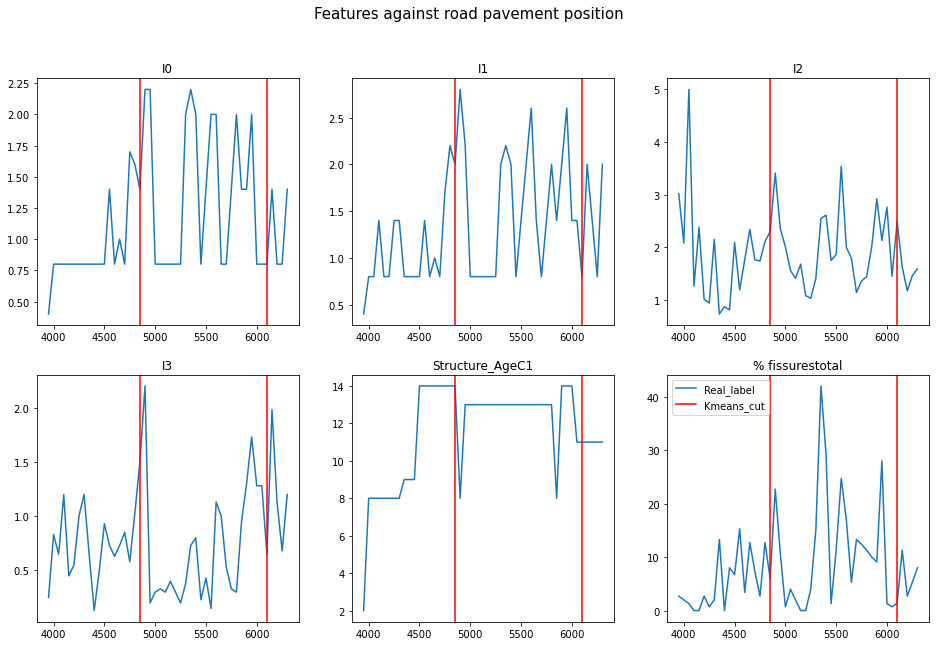

In [15]:
X = df[df.Real_label==8]
y = X.Real_label
columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]


fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.plot(X['distance axe début m'],X[columns[i+1]], label='Real_label')
        ax.axvline(4850.0, color='red', label='Kmeans_cut')
        ax.axvline(6100.0, color='red')
        ax.set_title(columns[i+1])
plt.legend()
plt.suptitle('Features against road pavement position',fontsize=15)
plt.show()

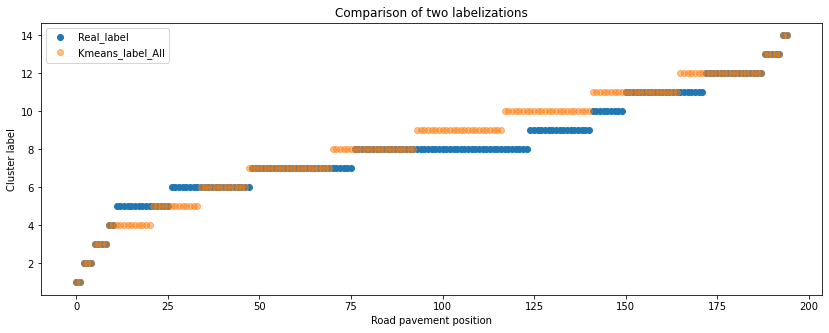

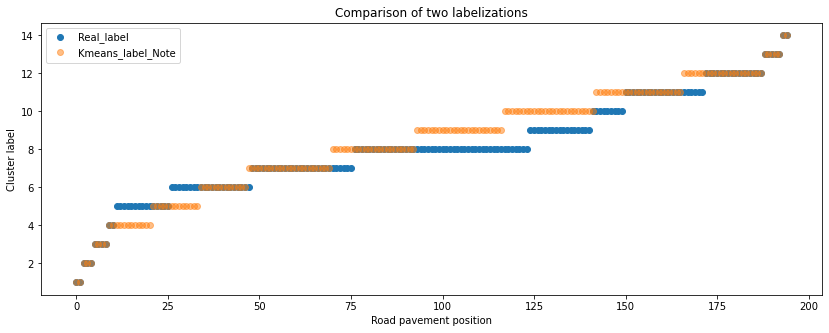

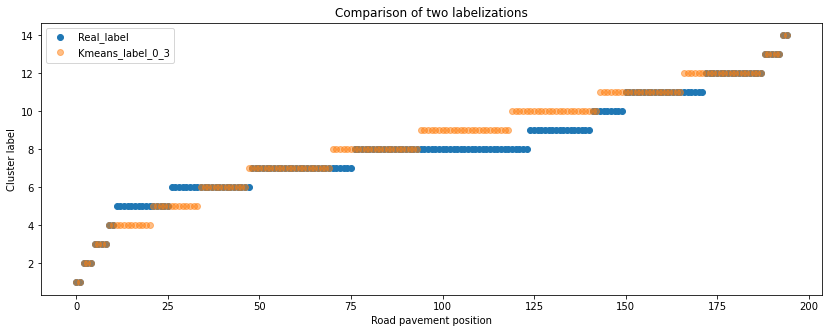

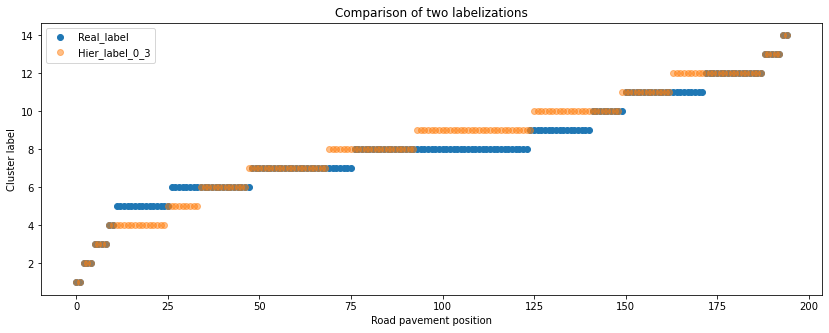

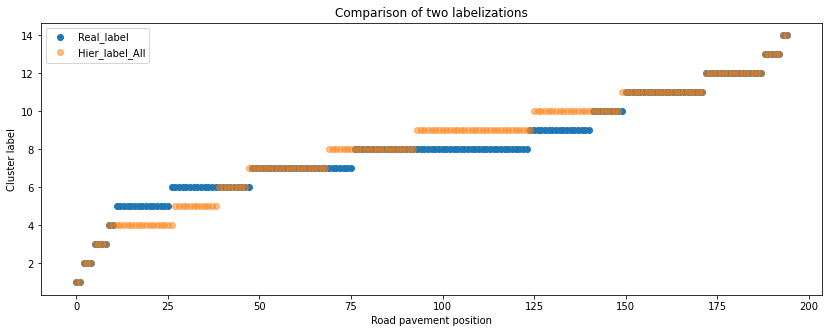

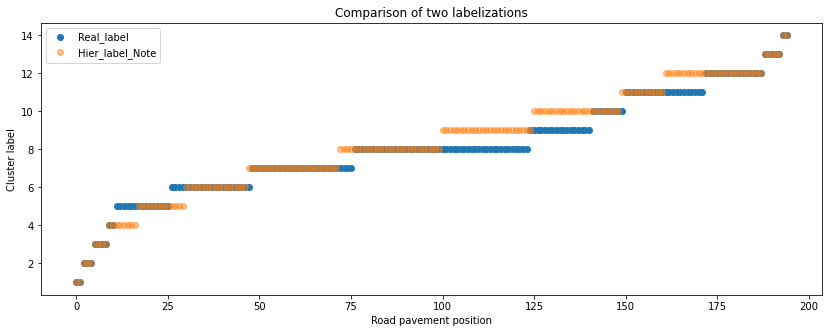

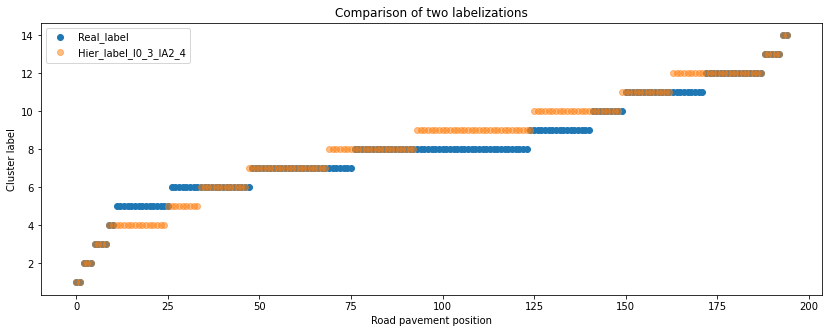

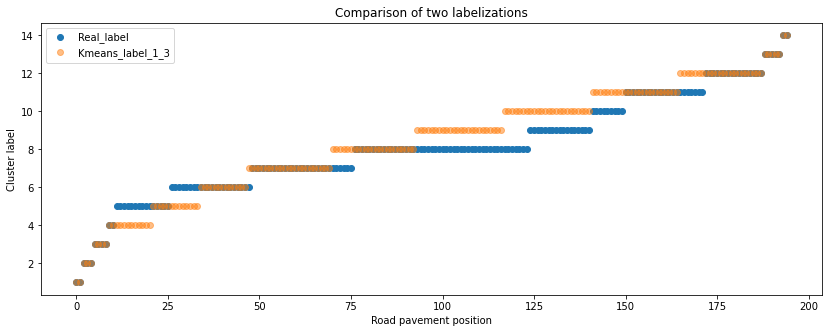

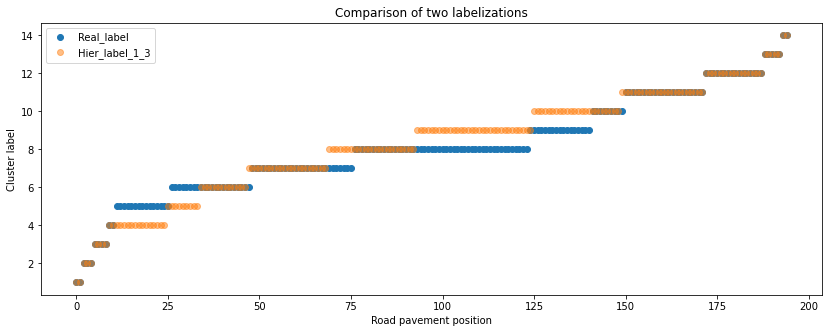

In [27]:
import re
for c in df.loc[:,[True if re.search('label',column) else False for column in df.columns]].columns[1:]:
    compare(df['Real_label'], df[c])

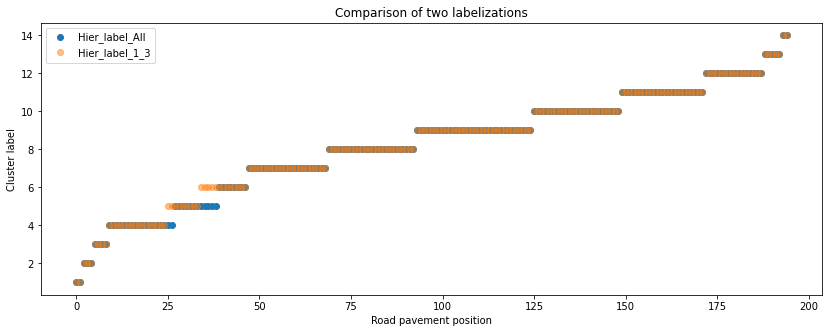

In [31]:
compare(df['Hier_label_All'], df['Hier_label_1_3'])

## Divisive hand made

In [43]:
data = pd.read_excel(path+'first_axis.xlsx')

columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]

X = data[columns]
X = X.replace({'-':None}).astype('float64')
X = X.fillna(X.median())
y = data['incrément chantiers']

cuts = cut_indices(data)
n_cut = len(cut_ind)

X_norm_0 = X.drop('distance axe début m',axis=1)
X_norm = (X_norm_0 - X_norm_0.min()) / (X_norm_0.max() - X_norm_0.min())

measures = data['Mesure optimale']
years = data['Année optimale']

In [33]:
def distance_matrix(X):
    dist=np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(i):
            dist[i][j] = np.linalg.norm(X.iloc[i]-X.iloc[j])
            dist[j][i] = dist[i][j]
    return dist

weights_ = pd.read_csv('data/weights.csv',index_col=0)
weights = weights_.loc[columns].weight.values

def distance_matrix_weighted(X):
    dist=np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(i):
            dist[i][j] = np.linalg.norm((X.iloc[i]-X.iloc[j])*weights)
            dist[j][i] = dist[i][j]
    return dist
    
def distance_centers(clus_1,clus_2):
    return np.linalg.norm(np.mean(clus_1)-np.mean(clus_2))


In [34]:
def split(X):
    max_ind=0
    max_dist=0
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = distance_centers(clus_1,clus_2)
        if d > max_dist:
            max_ind = i
            max_dist = d
    return X[:max_ind],X[max_ind:],max_dist

<ipython-input-35-f3267ef67153>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_centers'] = k+1


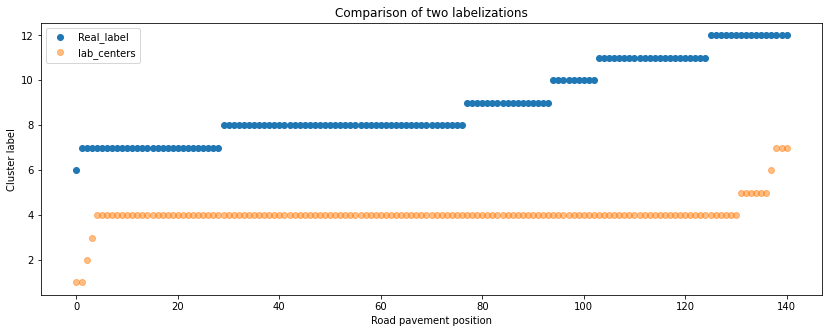

In [35]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split(clusters[i])
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_centers'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_centers)

In [36]:
def UPGMA(clus_1, clus_2, dist):
    sum = 0
    for i in clus_1.index:
        for j in clus_2.index:
            sum += dist[i,j]
    return sum /(len(clus_1)*len(clus_2))

def split_UPGMA(X,dist):
    max_ind=0
    max_dist=0
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist)
        if d > max_dist:
            max_ind = i
            max_dist = d
    return X[:max_ind],X[max_ind:],max_dist

<ipython-input-37-db06f8aae95a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_upgma'] = k+1


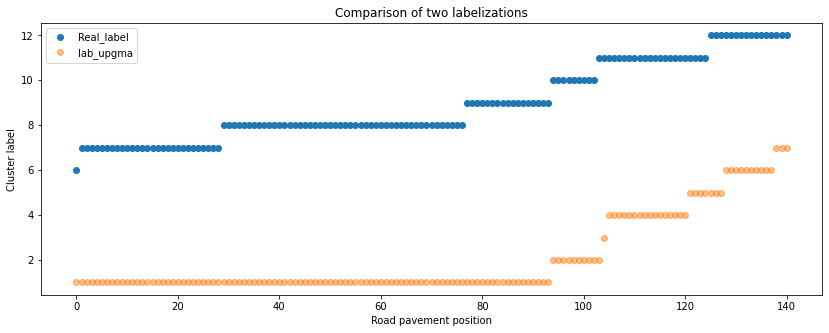

In [37]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]


n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)
for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_UPGMA(clusters[i],dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_upgma'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_upgma)

### Try with rules

In [38]:
def rules_length(cluster):
    if len(cluster)<5:
        return False
    if len(cluster)>40:
        return False
    return True

def split_r(X, rules, dist=None):
    max_ind=0
    max_dist=0
    max_ind_rules=0
    max_dist_rules=0
    respect=False
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist) # UPGMA(clus_1,clus_2,dist) distance_centers(clus_1,clus_2)
        if d > max_dist:
            max_ind = i
            max_dist = d
        if (rules(clus_1))|(rules(clus_2)):
            if d>max_dist_rules:
                max_ind_rules = i
                max_dist_rules = d
                respect = True
    if respect:
        return X[:max_ind_rules],X[max_ind_rules:],max_dist_rules
    return X[:max_ind],X[max_ind:],max_dist

<ipython-input-39-13a416b1a1e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_centers_rules'] = k+1


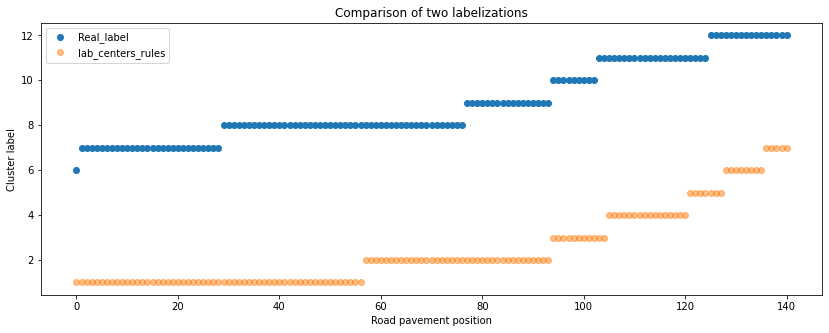

In [39]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
# dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length,dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_centers_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_centers_rules)

<ipython-input-40-5401a2fc3275>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_UPGMA_rules'] = k+1


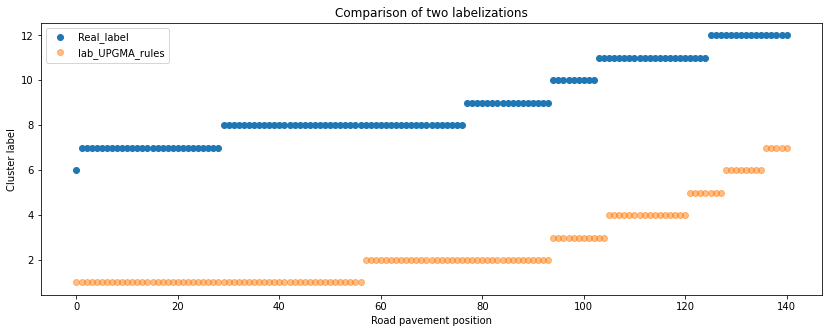

In [40]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length,dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_UPGMA_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

### Rules for years and measures

In [66]:
def rules_length_measure(cluster):
    measure = measures.loc[cluster.index]
    year = years.loc[cluster.index]

    if len(cluster)<5:
        return False
    if len(cluster)>40:
        return False
    main_measure = measure.value_counts().sort_values().index[-1]
    for i in range(len(measure)-5):
        if (measure.iloc[i]!=main_measure) & ((measure.iloc[i:i+5]==measure.iloc[i]).sum() == 5):
            return False
    return True


def rules_length_measure_year(cluster):
    measure = measures.loc[cluster.index]
    year = years.loc[cluster.index]

    if len(cluster)<5:
        return False
    if len(cluster)>40:
        return False
    main_measure = measure.value_counts().sort_values().index[-1]
    for i in range(len(measure)-5):
        if (measure.iloc[i]!=main_measure) & ((measure.iloc[i:i+5]==measure.iloc[i]).sum() == 5):
            return False
    if (max(year) - min(year))>5:
        return False
    return True
    
    

In [64]:
def split_r(X, rules, dist=None):
    max_ind=0
    max_dist=0
    max_ind_rules=0
    max_dist_rules=0
    respect=False
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist) # UPGMA(clus_1,clus_2,dist) distance_centers(clus_1,clus_2)
        if d > max_dist:
            max_ind = i
            max_dist = d
        if (rules(clus_1))|(rules(clus_2)):
            if d>max_dist_rules:
                max_ind_rules = i
                max_dist_rules = d
                respect = True
    if respect:
        return X[:max_ind_rules],X[max_ind_rules:],max_dist_rules
    return X[:max_ind],X[max_ind:],max_dist

<ipython-input-67-6f0d128373a1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_UPGMA_rules'] = k+1


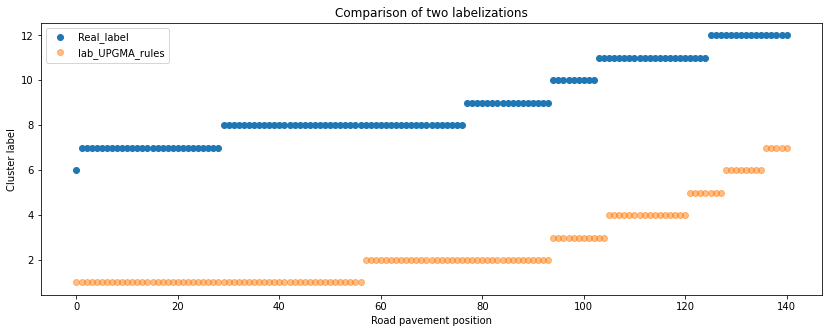

In [67]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length_measure,dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_UPGMA_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

<ipython-input-68-e4807b2ceaf3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_UPGMA_rules'] = k+1


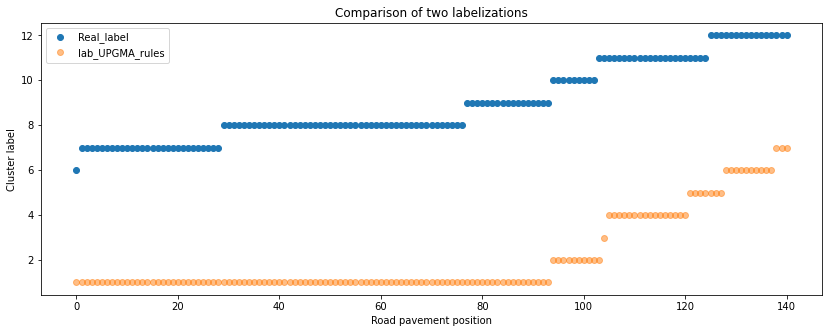

In [68]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length_measure_year,dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_UPGMA_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

In [59]:
(measures.loc[X_new1.index])

'RS'

## Measure cluster homogeneity

In [2]:
df=pd.read_excel('data/first_axis_labels.xlsx')
columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]


In [9]:
df[df.Ref_label.isin([10,11,12])][columns+['Ref_label','Kmeans_label_1_3']]

,distance axe début m,I1,I2,I3,Structure_AgeC1,% fissurestotal,Ref_label,Kmeans_label_1_3
124,6350.0,0.8,1.23,0.80,2,2.70,10,10
125,6400.0,0.8,1.38,0.50,2,0.00,10,10
126,6450.0,0.8,1.03,0.30,2,0.00,10,10
127,6500.0,0.8,2.16,0.23,2,2.70,10,10
128,6550.0,0.8,0.85,0.20,2,0.00,10,10
129,6600.0,0.8,1.21,0.65,8,2.70,10,10
130,6650.0,0.8,0.82,0.20,5,0.00,10,10
131,6700.0,0.8,0.66,0.70,5,0.00,10,10
132,6750.0,0.8,1.01,0.98,5,1.30,10,10
133,6800.0,1.4,0.72,1.30,5,3.30,10,10


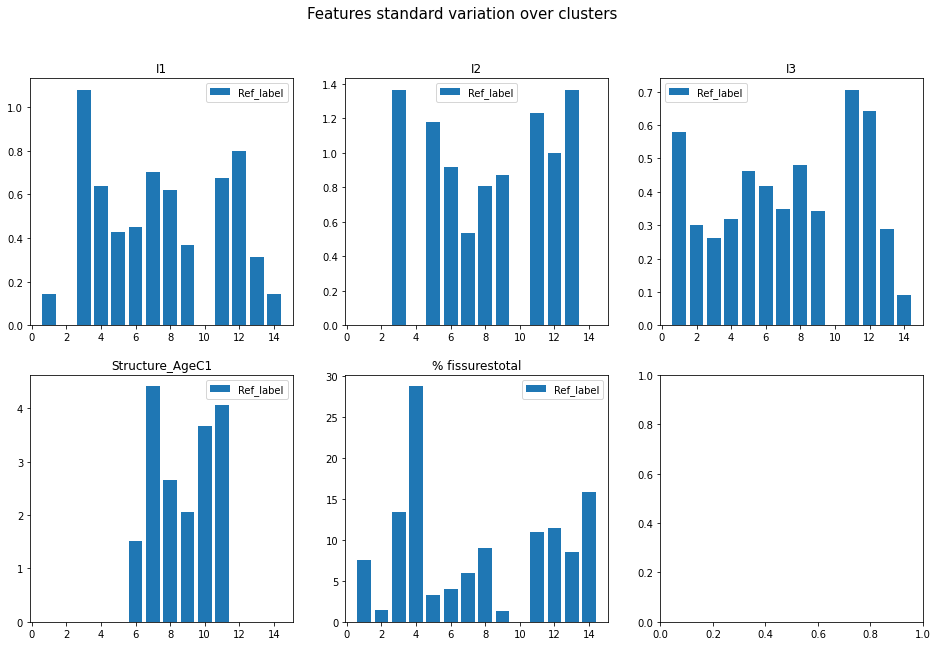

In [91]:
label = "Ref_label"

X = df.groupby(label).std()[columns]

fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.bar(adjust(X.index), X[columns[i+1]], label=label)
        ax.set_title(columns[i+1])
        ax.legend()
plt.suptitle('Features standard variation over clusters',fontsize=15)
plt.show()

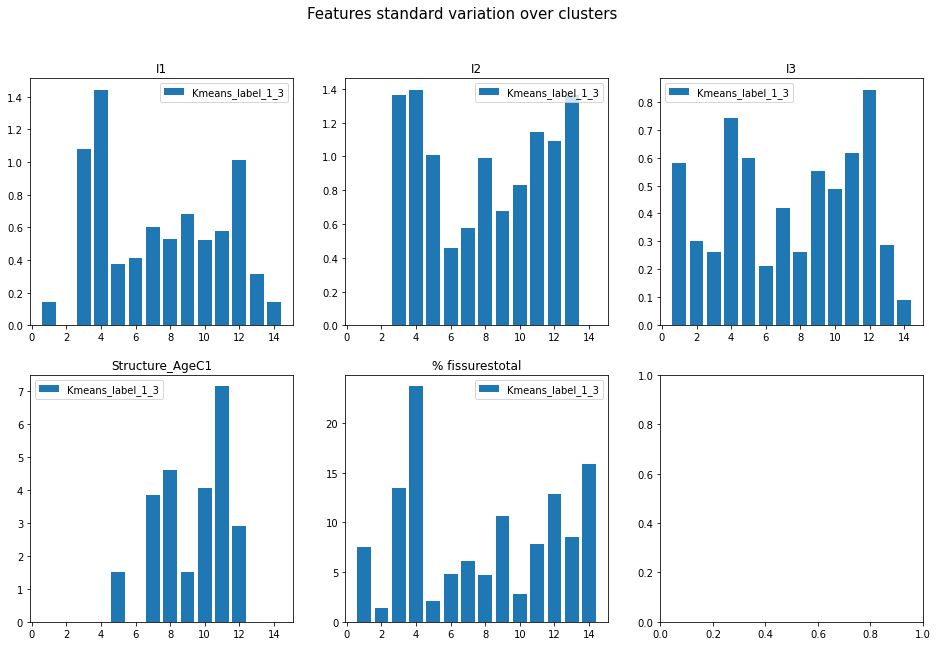

In [90]:
label = "Kmeans_label_1_3"

X = df.groupby(label).std()[columns]

fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.bar(adjust(X.index), X[columns[i+1]], label=label)
        ax.set_title(columns[i+1])
        ax.legend()
plt.suptitle('Features standard variation over clusters',fontsize=15)
plt.show()

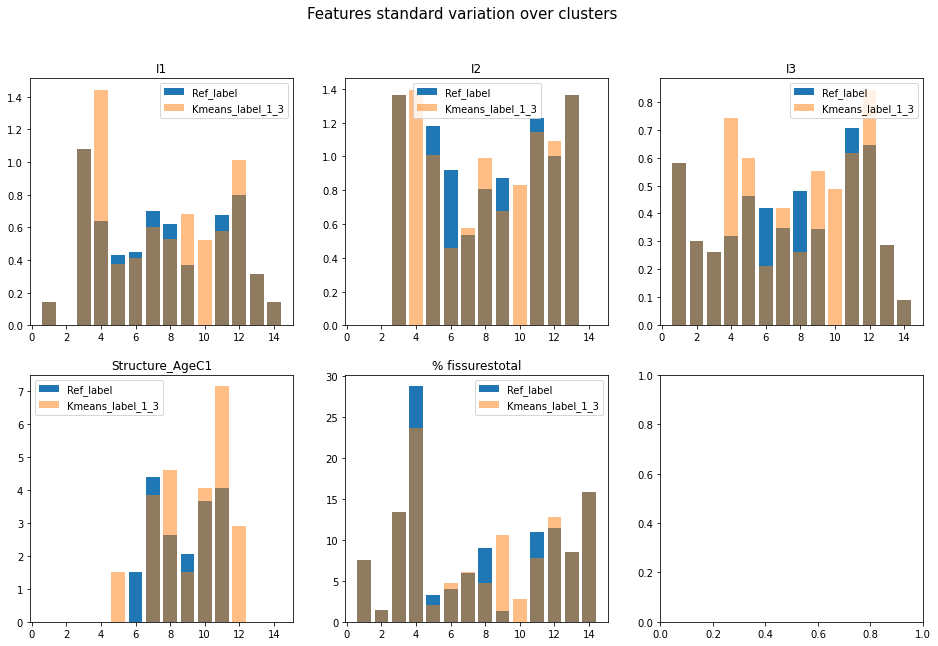

In [88]:
label = "Kmeans_label_1_3"

X = df.groupby('Kmeans_label_1_3').std()[columns]
X_ref = df.groupby('Ref_label').std()[columns]

fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.bar(adjust(X_ref.index), X_ref[columns[i+1]], label='Ref_label')
        ax.bar(adjust(X.index), X[columns[i+1]], alpha =0.5, label=label)
        ax.set_title(columns[i+1])
        ax.legend()
plt.suptitle('Features standard variation over clusters',fontsize=15)
plt.show()

### In terms of measures

In [126]:
label = "Ref_label"

data = pd.read_excel(path+'first_axis.xlsx')
measures = data['Mesure optimale']

df_m = df.copy()
df_m['Measure'] = measures
X = df_m.groupby(label)['Measure']


In [244]:
def measure_homogeneity(x):
    v = x.value_counts()
    optimal_percent = max(v)/sum(v) * 100

    optimal_measure = v.idxmax()
    k_max=0
    i=0
    while i < len(x):
        if (x.iloc[i]==optimal_measure):
            i+=1
        else:
            j = 1
            k=1
            while ((i+j)<len(x)):
                if (x.iloc[i+j]==x.iloc[i]):
                    j= j+1
                    k = k+1
                else:
                    j = len(x)
            k_max = max(k_max,k)
            i = i+k
    return (np.round(optimal_percent,1), k_max)
    

In [245]:
test = df_m[df_m[label]==7].Measure

In [246]:
measure_homogeneity(test)

(57.1, 7)

In [247]:
X.apply(measure_homogeneity)

Ref_label
1     (100.0, 0)
2     (100.0, 0)
3      (50.0, 2)
4     (100.0, 0)
5      (46.7, 3)
6      (81.8, 3)
7      (57.1, 7)
8      (54.2, 5)
10     (70.6, 3)
11    (100.0, 0)
12     (50.0, 3)
14     (50.0, 3)
15     (60.0, 1)
16    (100.0, 0)
Name: Measure, dtype: object